# Assignment 5
## Decision Trees and Random Forests for Regression

### About this notebook

The notebook has two parts, as has the assignment, the first part being a "tutorial like" walkthrough, the second asking you to implement a regression tree yourself. Hence, when going through the first part, remember that you need to have time left to actually work with the second!

Both parts of the assignment can be handled within this notebook, however, the ID3-implementation should be done in a separate Python-script (ID3_reg.py). Feel free to move the second part to its own notebook for better overview. In any case, if you make changes in the Python file, you might need to restart the kernel for the notebook that is using it, so that changes get properly loaded.


In [ ]:
# YOU DON'T HAVE TO RUN THIS IF EVERYTHING IS ALREADY INSTALLED CORRECTLY
!pip3 install --upgrade pip
!pip3 install graphviz
!pip3 install dtreeviz
!pip3 install numpy scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part 1

## Dataset

First we load the dataset. Ultimately, you should be working with the California housing data, but for quicker test runs, it might help to first start out with the Diabetes data.

In [ ]:
#run time 0.8s

from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from ConceptDataRegr import ConceptDataRegr
from sklearn.model_selection import train_test_split 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

test_case = 'diabetes'
#test_case = 'california'

if test_case == 'california':
    dataset = fetch_california_housing()
elif test_case == 'diabetes':
    dataset = load_diabetes()
else:
    raise ValueError('Unknown test case')

X = dataset.data
y = dataset.target


Some information about the dataset you're looking at

In [ ]:
if test_case == 'california' :
    print("target:", list(dataset.target_names))
print("features:", list(dataset.feature_names))
print("description:", dataset.DESCR)


features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of 

Split it into train, validation and test sets.

In [ ]:
#run time 0.7s

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

What is the reason why you would like to have validation and test set and not just a test set?

More guiding questions:
How can you use the validation set?
Can you use the validation set in some way to tune the hyperparameters of your model?
Can you use the test set to tune the hyperparameters of your model?
You can come back to these questions later if you're not sure yet.

## Decision Tree Regressor

Run the cells below and inspect the output. Use the documentation where needed. Be prepared to answer questions posed by the TA.

In [ ]:
#run time 0.7s

from sklearn.tree import DecisionTreeRegressor

regressor1 = DecisionTreeRegressor(random_state=0)

Now let's examine the decision tree.

In [ ]:
#run time 1.8s

from sklearn.model_selection import cross_val_score

cross_val_score(regressor1, X_train, y_train, cv=10)

array([-0.02144221,  0.0614295 ,  0.09449354, -0.05130063,  0.36838284,
       -0.55354206, -0.00338336, -0.14397523,  0.25445472,  0.12892033])

In [ ]:
#run time 0.3s

regressor1.fit(X_train, y_train)
regressor1.score(X_test, y_test)

-0.057750608640022794

What do these numbers mean?
Check out [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
and [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree)
to find the answers.

How do you interpret the numbers?

Let's have a look at two other parameters, max_depth and min_samples_leaf.
How do you interpret the following numbers?

## Decision Tree Parameters

In [ ]:
#run time 0.2s

regressor2 = DecisionTreeRegressor(max_depth=1, random_state=0)
cross_val_score(regressor2, X_train, y_train, cv=10)

array([ 0.06376428,  0.14919576, -0.01133969,  0.06887429,  0.25102598,
        0.15290758,  0.28438258,  0.24414713,  0.24351975,  0.20996688])

In [ ]:
#run time 0.1s

regressor2.fit(X_train, y_train)
regressor2.score(X_test, y_test)

0.12280882071603205

In [ ]:
#run time 1.2s

regressor3 = DecisionTreeRegressor(min_samples_leaf=20, random_state=0)
cross_val_score(regressor3, X_train, y_train, cv=10)

array([0.34323928, 0.58953385, 0.32737132, 0.25473796, 0.49111802,
       0.37323669, 0.52956238, 0.53937286, 0.43288923, 0.46557799])

In [ ]:
#run time 0.1s

regressor3.fit(X_train, y_train)
regressor3.score(X_test, y_test)

0.01954166471529928

## Decision Tree Visualization

The next cells give examples how to visualize regressor2 and regressor3.

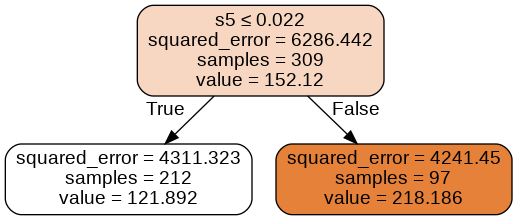

In [ ]:
#run time 0.2s

from sklearn import tree
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(regressor2, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor2")
Image("decision_tree_regressor2.png")

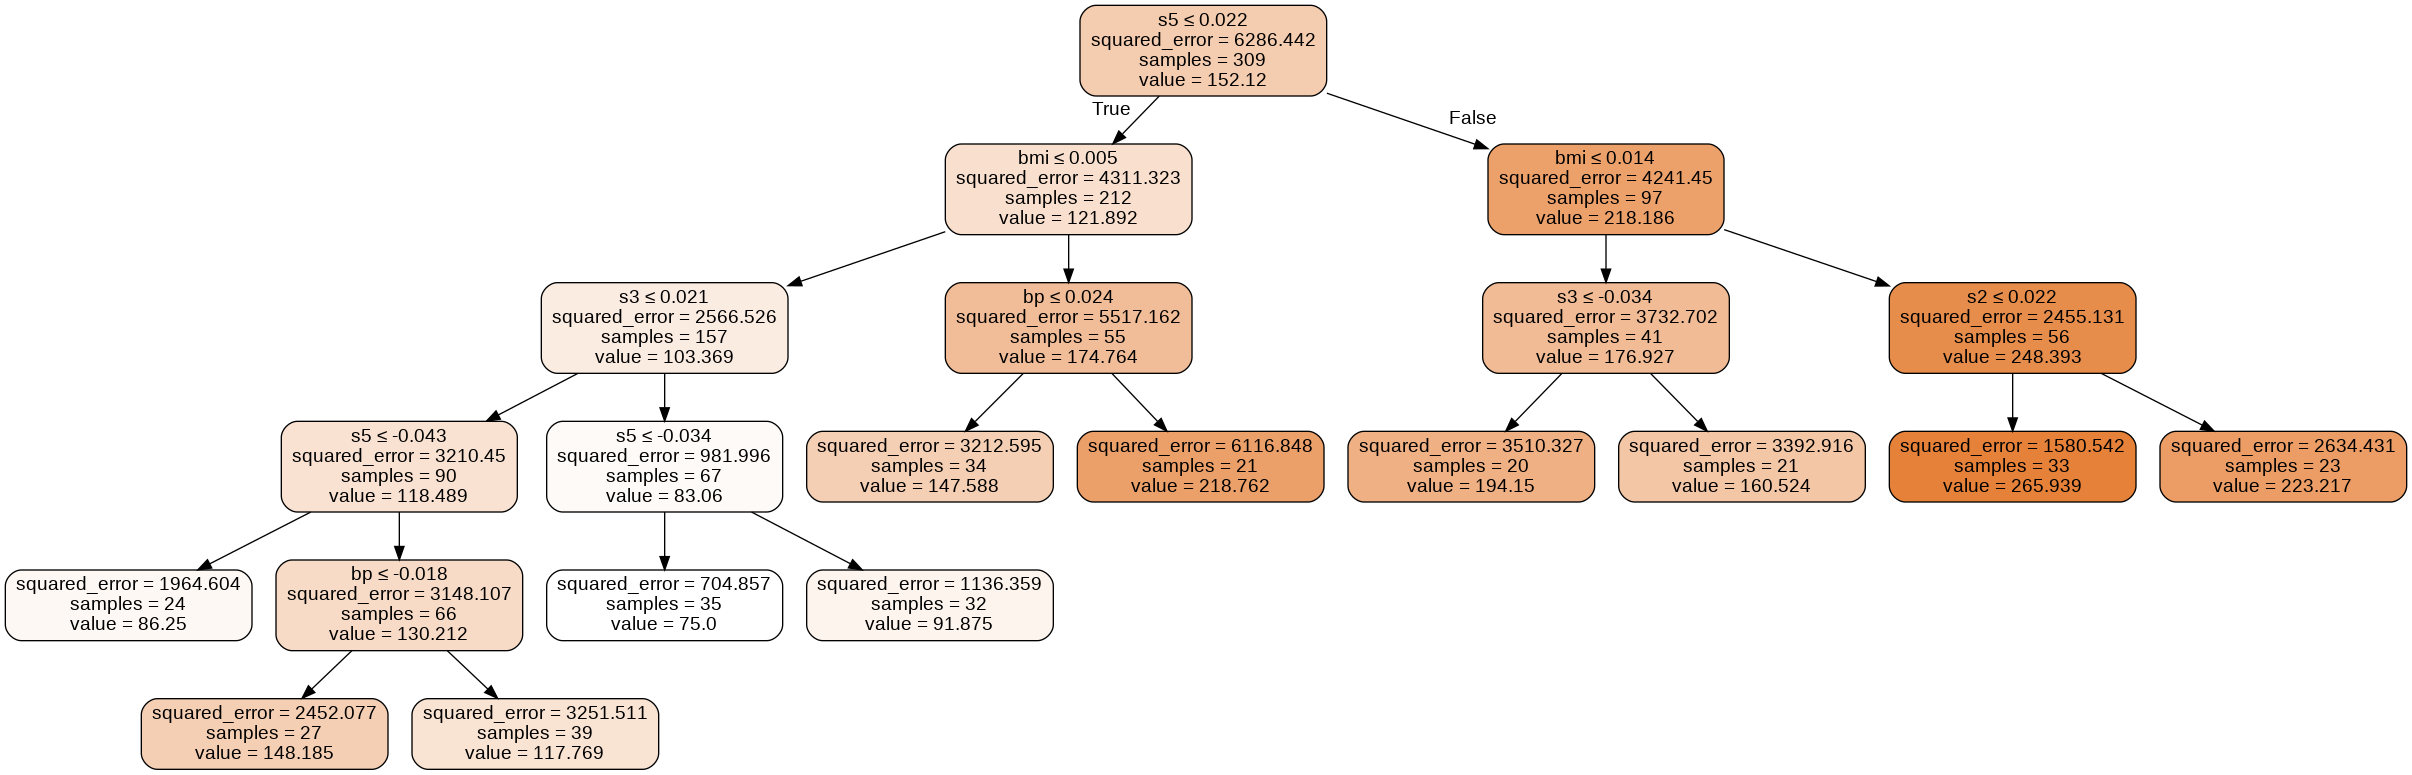

In [ ]:
#run time 4.8s

dot_data = tree.export_graphviz(regressor3, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor3")
Image("decision_tree_regressor3.png")

Another nice way to visualize the decision trees nicely is with dtreeviz. To make these plots it takes quite some time, so we recommend to use this visualization tool for trees with few nodes. 

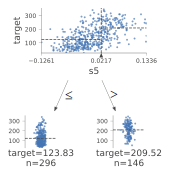

In [ ]:
# run time 6.9s

from dtreeviz.trees import dtreeviz

viz = dtreeviz(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names)
#viz.view()
# this opens the visualization in a new window. If you want to display the output inside the notebook use:
viz
# if you want to store the output in a file use:
#viz.save("dtreeviz.svg")
# instead

## Explainability

If you want to visualize (explain) the decision path for one prediction, you can also use dtreeviz:

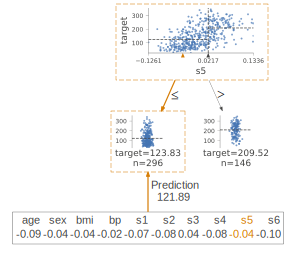

In [ ]:
# run time 6.8s

import numpy as np

sample = X_test[np.random.randint(0, len(X_test)),:] # random sample from training

viz = dtreeviz(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names,
                X=sample)
#viz.view()
viz

For bigger graphs you just show the decision path

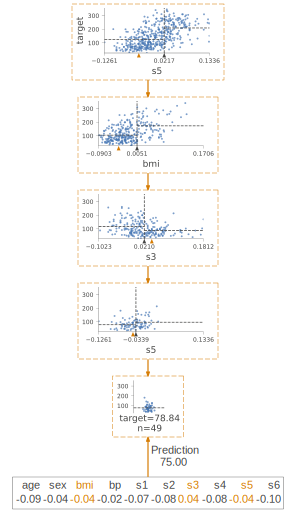

In [ ]:
# run time 10.4s

viz = dtreeviz(regressor3, X, y,
                target_name="target",
                feature_names=dataset.feature_names,
                X=sample,
                show_just_path=True)
#viz.view()
viz

Another option to explain the prediction for big trees is this

In [ ]:
# run time 0.1s

from dtreeviz.trees import explain_prediction_path

print(explain_prediction_path(regressor3, sample, feature_names=dataset.feature_names, explanation_type="plain_english"))

bmi < 0.01
0.02 <= s3 
s5 < -0.03



## Pruning

### Cost Complexity Pruning

A smart way of pruning is to use cost complexity pruning. This method is based on the idea that a tree with a lot of nodes is more likely to overfit than a tree with few nodes. Therefore, we can prune the tree by removing nodes that are not important for the prediction. The cost complexity pruning method uses a parameter $\alpha$ to determine how many nodes to remove. It basically is a tradeoff between having a tree with many nodes that has a small total MSE, vs. a tree with fewer nodes but greater total MSE. The following code shows how to use the cost complexity pruning method.

We find the alphas that change the Decision Tree to be "cut down" and we record the worsening of the MSE.

In [ ]:
# run time 0.8s

path = regressor1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

We can then plot the MSE for each $\alpha$.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

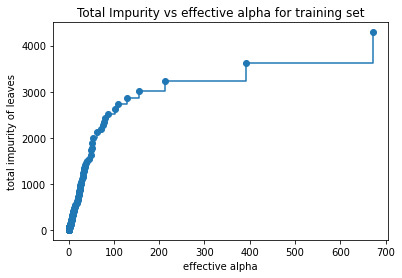

In [ ]:
# run time 0.4s

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

You can now train a Decision Tree for each $\alpha$.

In [ ]:
# run time 0.2s

regressors = []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(min_samples_leaf=20, random_state=0, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        regressors[-1].tree_.node_count, ccp_alphas[-1]
    ),
)
if regressors[-1].tree_.node_count == 1:
    print("Removing last node.")
    regressors = regressors[:-1]
    ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 1997.0530908365427
Removing last node.


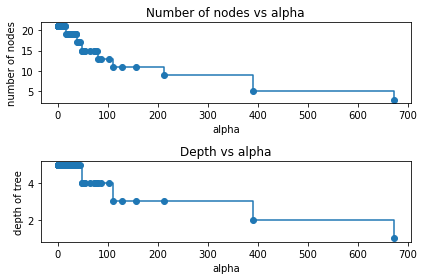

In [ ]:
# run time 0.5s

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

This is a way to get all the scores for each tree

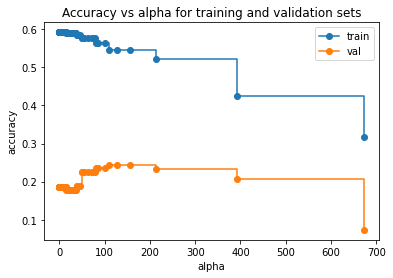

In [ ]:
# run time 0.6s

train_scores = [regressor.score(X_train, y_train) for regressor in regressors]
val_scores = [regressor.score(X_val, y_val) for regressor in regressors]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

The best tree is the one with the highest score.

In [ ]:
# run time 0.8s

idx_max = np.argmax(val_scores)
regressor_best = regressors[idx_max]
print("Best alpha: {}".format(ccp_alphas[idx_max]))

Best alpha: 110.08077212251897


In [ ]:
# run time 0.7s

regressor_best.score(X_test, y_test)

0.056088365184336575

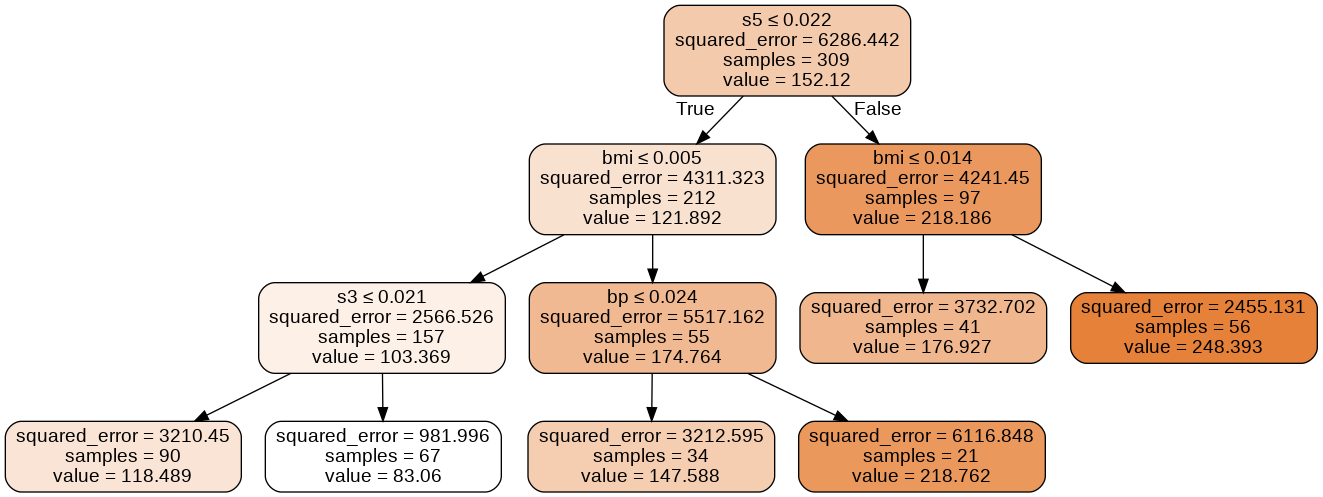

In [ ]:
# run time 0.8s

dot_data = tree.export_graphviz(regressor_best, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor_best")
Image("decision_tree_regressor_best.png")

## Ensemble methods: 

Experiment with at least two methods. Inspect the documentation of the different estimators. Note that you can use regressors as estimators within an ensemble that are themselves based on an ensemble. Below is an example for a (tiny) voting ensemble. Visualise your results to be able to discuss them!

In [ ]:
# run time 1.2s

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

voting=VotingRegressor(estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor())])
voting.fit(X_train, y_train)
voting.score(X_test, y_test)

0.24263506416132496

## Boosting!

Experiment with an AdaBoostRegressor and interpret the results. 

In [ ]:
# run time 0.2s

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
from sklearn.ensemble import AdaBoostRegressor
number_of_trees = 10
boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=number_of_trees, random_state=0)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

-0.05325312144768923

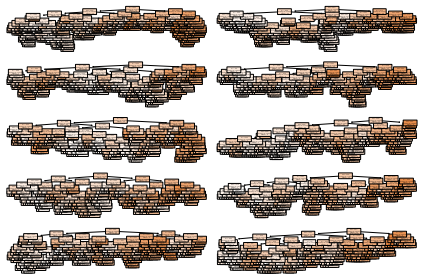

In [ ]:
# run time 1m 13s to 3m

fig, ax = plt.subplots(5,2)
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    tree.plot_tree(boosting.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()

## Random Forests

Experiment with different parameters for the RF-Regressor. Test at least two different parameter sets.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 10
forest = RandomForestRegressor(n_estimators=number_of_trees, random_state=0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.06963643367615135

In [ ]:
for treeid in range(number_of_trees):
    dot_data = tree.export_graphviz(forest.estimators_[treeid], feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png") 
    graph.render("forest_treeid"+str(treeid))

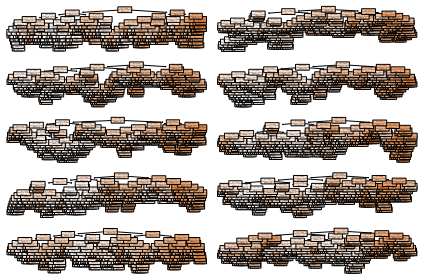

In [ ]:
# run time 1m 23s to 3m

fig, ax = plt.subplots(5,2)
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    tree.plot_tree(forest.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()

# Part 2

Implement your own version of a regression tree by using the provided code skeleton which you can find in ID3_reg.py. If you prefer to implement your own tree entirely, this is fine, but you should be confident in handling the implementation of the recursion properly. Please note: the actual task description (which evaluations to provide and discuss) is given in Canvas, as is a check list.

In [ ]:
!pip3 install ordered_set

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Discretizing the data

To make experiments with categorical data, you need to discretize the data (this goes both for the 'california' and the 'diabetes' cases). In order to have the entire data set "as is" for the binning, you can prepare a binning rule on the original data (X, if you continue to work with the data from part 1), that you then apply to your train and test data sets. To make sure that you do not miss any possible attribute values, use the entire set (X) again when providing the categorical values (here bin indices) to the ID3 tree.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# you might want to try different numbers of bins
# inspect the data set description in part 1 to find suitable numbers 
if test_case == 'california':
    bins = [2,2,2,2,2,2,2,2]
elif test_case == 'diabetes':
    bins = [2,2,2,2,2,2,2,2,2,2]

# here you can test to use different strategies, see the KBinsDiscretizer documentation
binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='kmeans')
binning_rule = binner.fit(X)


## Creating and evaluating an ID3-based Regression Tree

The following cells provide some framework for creating / testing your own, ID3-based, regressor. To see that your tree is constructed correctly, some prints are provided (essentially from the lecture) within the handout directory, that are created with the "ConceptData" from the lecture. 

{'wind': ['strong', 'weak'], 'airTemp': ['warm', 'cold'], 'humidity': ['normal', 'high'], 'sky': ['sunny', 'cloudy', 'rainy'], 'waterTemp': ['warm', 'cool'], 'forecast': ['same', 'change']}


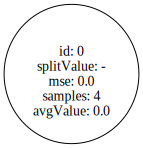

In [ ]:
import ID3_reg
import ConceptDataRegr as cd
import graphviz
# For testing that you get the correct output from your own implementation, use the "ConceptData" data set:
test_case = 'concept'

if test_case == 'concept' :
    attributes, binned_X_train, y_train, binned_X_test, y_test = cd.ConceptDataRegr().get_data()
    binned_X_val = []
    y_val = []
     
else :
    # if running on "real" data, you now need to use the binning_rule you computed above 
    binned_X = binning_rule.transform(X).astype(int)
    binned_X_train = binning_rule.transform(X_train).astype(int)
    binned_X_val = binning_rule.transform(X_val).astype(int)
    binned_X_test = binning_rule.transform(X_test).astype(int)

    attributes = {}
    i = 0
    for attr in dataset.feature_names :
        attributes[attr] = set(binned_X[:,i])
        i+=1

print(attributes)

# Now, set up the tree (inspect the ID3_reg class!)    
id3 = ID3_reg.ID3RegressionTreePredictor()

# visualising in the "bubble" format from the lecture
myTree = id3.fit(binned_X_train, y_train, attributes)
dot_data = id3.makeDotData().source
graph = graphviz.Source(dot_data, format="pdf")
graph.render(test_case+"_bubbles")
graph

In [ ]:
predicted = id3.predict(binned_X_val)
print(predicted)

# As of now, the ID3_reg class does only provide a stubb of a score-method - please implement one according to
# the description of DecisionTreeRegressor.score() for easier comparison with the scikit-learn trees!
id3.score(binned_X_test, y_test)

In [ ]:
# printing to squares if you want a tree that looks more like those from part 1 ;-)
dot_data_pretty='digraph Tree {\n'+\
    'node [shape=box'+\
    ', style="rounded", color="black"'+\
    ', fontname="helvetica"] ;\n'+\
    'graph [ranksep=equally, splines=polyline] ;\n'+\
    'edge [fontname="helvetica"] ;\n'+\
    dot_data[9:]

graph = graphviz.Source(dot_data_pretty, format="png")
graph.render(test_case+"_pretty")
#graph.view()
graph